In [1]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount = True)

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/My Drive/Document/DS&AI/Machine_Learning/Course_4/LDS6_NgoTrongNhan/Week_1/Chapter_2"

/content/gdrive/My Drive/Document/DS&AI/Machine_Learning/Course_4/LDS6_NgoTrongNhan/Week_1/Chapter_2


1. Loading data

In [3]:
import pandas as pd
data = pd.read_excel("Iris.xls")
data.head(3)

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


**2. Input: Petallength và Output: Petalwidth**

In [4]:
data_for_train = data[["petallength", "petalwidth"]]
data_for_train.head(3)

,petallength,petalwidth
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


3. Discovering the relationship both of petallength and petalwidth

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Petal width')

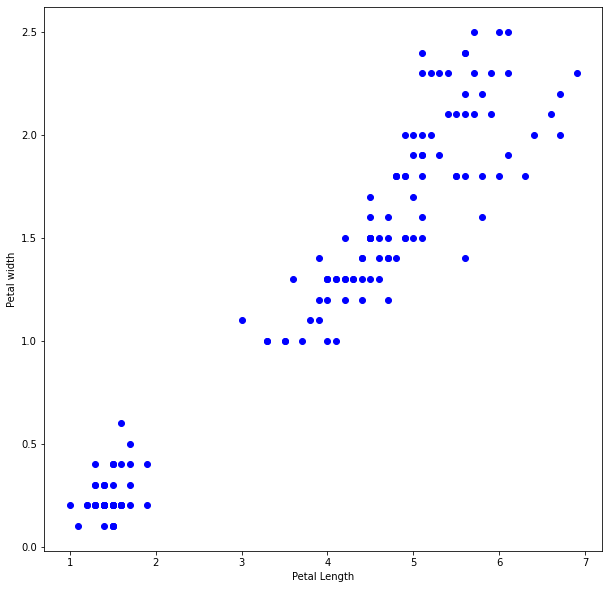

In [6]:
#1 using matplotlib
plt.figure(figsize=(10,10))
plt.plot(data_for_train.petallength, data_for_train.petalwidth, "o", color = "blue")
plt.xlabel("Petal Length")
plt.ylabel ("Petal width")

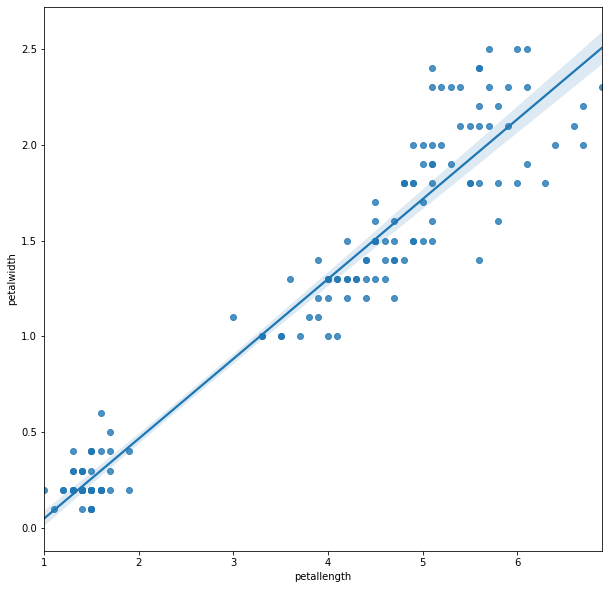

In [7]:
#2 using seaborn
plt.figure(figsize = (10,10))
sns.regplot(data = data_for_train, x = "petallength", y ="petalwidth")
plt.show()

In [8]:
#3 dua vao correlation
data_for_train.corr(method="pearson")

,petallength,petalwidth
petallength,1.000000,0.962757
petalwidth,0.962757,1.000000


**4. spliting the data to 2 dataframe with including Input/independent variable and Output/ dependent variable**

In [9]:
input = data_for_train[["petallength"]]
output = data_for_train[["petalwidth"]]

**5. Create X_train, y_train, X_test, y_test from input and output (that has just created)**

In [10]:
import numpy as np
import sklearn as skl
import sklearn.model_selection #train_test_split
import sklearn.linear_model  # LinearRegression
import sklearn.metrics # using mean_squared_error, r2_score

In [11]:
X_train, X_test,y_train, y_test = sklearn.model_selection.train_test_split(input,
                                                                            output,
                                                                            test_size = 0.2)

In [19]:
model_linear_regr = sklearn.linear_model.LinearRegression() #return obj LR model

In [20]:
model_linear_regr.fit(X_train, y_train) # model_1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

6. Chek and customize 

In [21]:
#step 1: create y_hat (the value of prediction)
y_hat = model_linear_regr.predict(X_test) # create y_hat (the value of prediction)

In [22]:
y_test.shape

(30, 1)

In [16]:
#step 2: create a DF with include 2 colum (Actual value of y and prediction of y hat)
# Actual value of y --> y_test
# prediction value --> y_hat

In [23]:
df = pd.DataFrame({"Actual":pd.DataFrame(y_test.values)[0].values,
                   "Prediction": pd.DataFrame(y_hat)[0].values})
df.head()

,Actual,Prediction
0,2.1,2.039137
1,1.9,1.868434
2,1.8,1.783082
3,1.5,1.527027
4,1.6,1.783082


In [24]:
# step 3: tim slope va intercept cua line of linear regression
# slope = correlation coefficient cua model
m = model_linear_regr_1.coef_[0] # vi model_linear_regr_1.coef 
# --> retrun ra 1 array object with 1 value 
# --> [0] to get this value
b = model_linear_regr.intercept_
print ("Coefficients: \n", m)
print ("Intercept: \n", b)

Coefficients: 
 [0.42675787]
Intercept: 
 [-0.39338319]


In [25]:
# y_hat = mx+b vi minh su dung linear regression va chi co 1 independent variable
# Neu nhieu indepenent --> dung Model_name.predict(x_input) --> y_predict

In [26]:
# create a DataFrame to see total prediction of model
df_1 = pd.DataFrame({"PentalWidth actually": output["petalwidth"].values, 
                     "PeantalWidth preidicted": pd.DataFrame(model_linear_regr_1.predict(input))[0].values})
df_1.head(5)

,PentalWidth actually,PeantalWidth preidicted
0,0.2,0.204078
1,0.2,0.204078
2,0.2,0.161402
3,0.2,0.246754
4,0.2,0.204078


In [27]:
#Step 4: tính MSE và variance score để check model có hiểu quả hay không ?

In [28]:
#  MSE cho ca bo du lieu 
# (MSE = 1/n*(sumof(pentalwidth actually - pentalwidth predicted)^2))
MSE = sklearn.metrics.mean_absolute_error(output, model_linear_regr_1.predict(input))

In [29]:
 # the variance score = 1 is perfect prediction
variance_score = model_linear_regr_1.score(input, output) #Return the coefficient of determination R^2 of the prediction.

In [30]:
print ("Mean squared error: %.2f" % MSE)
print ("Variance score: %2.f" %variance_score)

Mean squared error: 0.16
Variance score:  1


**Nhân xét: Variance score = 1 --> pefect prediction **
**MSE = 0.16 is too small --> approve**

In [31]:
#step 5: check variance score in training phase and test to make sure
# this model don't be overfitting or underfitting 

In [39]:
model_linear_regr.score(X_train, y_train)

0.9245359580952118

In [40]:
model_linear_regr.score(X_test, y_test)

0.933190919023052

In [34]:
#both training data and testing data have high score --> choose this model

In [35]:
# step 6: đưa về dạng Regression line
# note in this case is simple Linear Regression --> y = b+mx 
# --> 2 way to generate regression line

In [41]:
#cach 1: lam bang tay
reg_line_1 = [(m*float(x)) + b for x in np.array(input)]  # cu moi input se co 1 y_hat

In [42]:
# cach 2: dung model_name.predict(input)
reg_line_2 = model_linear_regr.predict(input)

In [43]:
x_new = [[1.5]] # pentalWidth new
y_new = model_linear_regr.predict(x_new)
y_new

array([[0.24675362]])

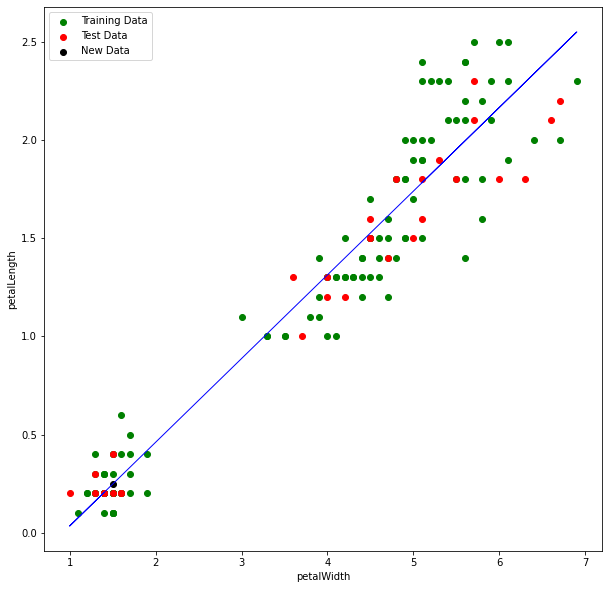

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train, color = "green", label = "Training Data")
plt.scatter(X_test, y_test, color = "red", label = "Test Data")
plt.scatter(x_new, y_new, color = "black", label = "New Data")
plt.plot(input, reg_line_1, color = "blue", linewidth = 1)

plt.xlabel("petalWidth")
plt.ylabel("petalLength")
plt.legend()
plt.show()